In [1]:
#READ FILE

import pandas as pd

df = pd.read_csv(r"C:\Users\Aalio\Documents\Projects\Perfume App\data\fra_cleaned.csv",
                 encoding="windows-1252",
                 sep=";")
print(df.head())
print(df.info())

                                                 url  \
0  https://www.fragrantica.com/perfume/xerjoff/ac...   
1  https://www.fragrantica.com/perfume/jean-paul-...   
2  https://www.fragrantica.com/perfume/jean-paul-...   
3  https://www.fragrantica.com/perfume/bruno-bana...   
4  https://www.fragrantica.com/perfume/jean-paul-...   

                          Perfume               Brand  Country  Gender  \
0  accento-overdose-pride-edition             xerjoff    Italy  unisex   
1            classique-pride-2024  jean-paul-gaultier   France   women   
2            classique-pride-2023  jean-paul-gaultier   France  unisex   
3               pride-edition-man        bruno-banani  Germany     men   
4         le-male-pride-collector  jean-paul-gaultier   France     men   

  Rating Value  Rating Count    Year  \
0         1,42           201  2022.0   
1         1,86            70  2024.0   
2         1,91           285  2023.0   
3         1,92            59  2019.0   
4         1,93    

In [10]:
#CLEAN AND PREPROCESS KEY COLUMNS

#turn empty strings/NaN to None
text_cols = ['Top', 'Middle', 'Base', 'mainaccord1','mainaccord2','mainaccord3','mainaccord4','mainaccord5','Perfumer1','Perfumer2']
df[text_cols] = df[text_cols].fillna('None')
df['Year'] = df['Year'].fillna(df['Year'].median())


#change the ',' to '.'
df['Rating Value'] = df['Rating Value'].astype(str).str.replace(',','.').astype(float)
print(df['Rating Value'].head())
print(df['Rating Value'].dtype)

#combine notes into one column for text-based analysis
df['All_Notes'] = df['Top'] + ', ' + df['Middle'] + ', ' + df['Base']
print(df['All_Notes'].head())
print(df['All_Notes'].dtype)

0    1.42
1    1.86
2    1.91
3    1.92
4    1.93
Name: Rating Value, dtype: float64
float64
0    fruity notes, aldehydes, green notes, bulgaria...
1    yuzu, citruses, orange blossom, neroli, musk, ...
2    blood orange, yuzu, neroli, orange blossom, mu...
3    guarana, grapefruit, red apple, walnut, lavend...
4    mint, lavender, cardamom, artemisia, bergamot,...
Name: All_Notes, dtype: object
object


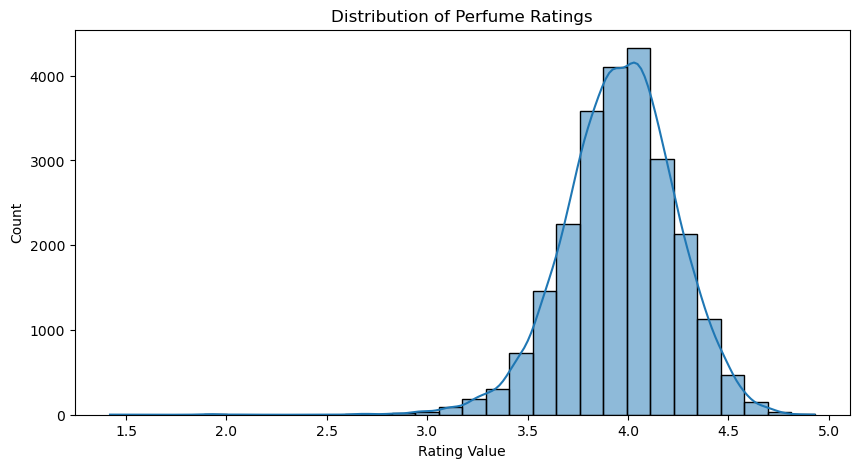

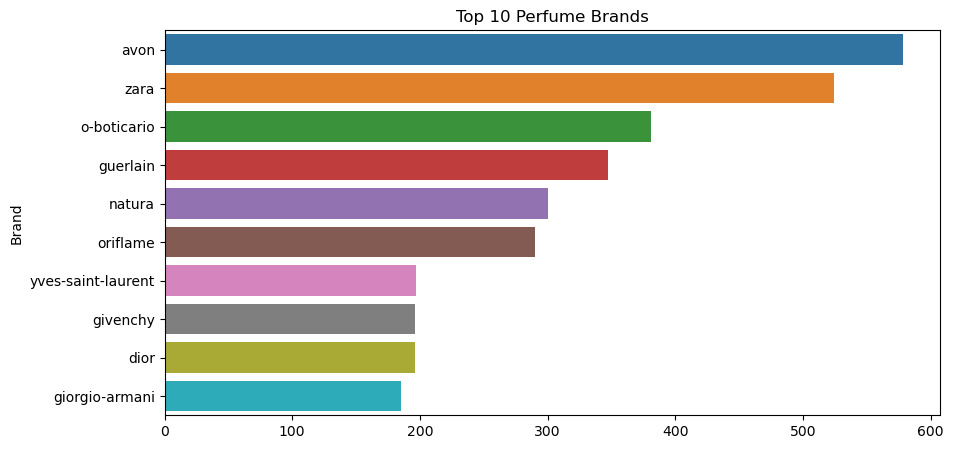

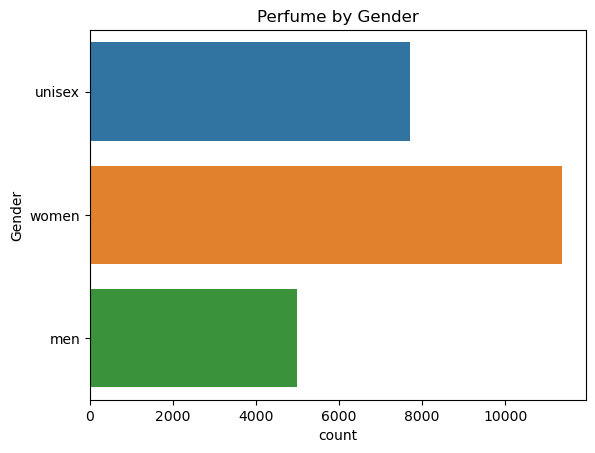

In [13]:
#BASIC ANALYSIS AND INSIGHT
import matplotlib.pyplot as plt
import seaborn as sns

#ratings distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Rating Value'], bins=30, kde=True)
plt.title('Distribution of Perfume Ratings')
plt.show()

#top brands
top_brands = df['Brand'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title('Top 10 Perfume Brands')
plt.show()

#gender distribution
sns.countplot(y='Gender', data=df)
plt.title('Perfume by Gender')
plt.show()

In [17]:
#COUNT MOST COMMMON NOTES FOR TEST ANALYSIS
from collections import Counter

all_notes = df['All_Notes'].str.lower().str.split(', ')
notes_count = Counter([note for sublist in all_notes for note in sublist])
print("Top 20 most common notes:")
notes_count.most_common(20)

Top 20 most common notes:


[('musk', 11022),
 ('bergamot', 8617),
 ('sandalwood', 8059),
 ('jasmine', 7745),
 ('amber', 7730),
 ('patchouli', 7254),
 ('vanilla', 6742),
 ('rose', 6251),
 ('cedar', 5628),
 ('mandarin orange', 4007),
 ('vetiver', 3911),
 ('tonka bean', 3347),
 ('lemon', 3036),
 ('lavender', 2732),
 ('orange blossom', 2679),
 ('lily-of-the-valley', 2602),
 ('pink pepper', 2464),
 ('cardamom', 2371),
 ('violet', 2317),
 ('iris', 2316)]

In [16]:
#ENCODING FOR CLUSTERING/RECOMMENDATIONS
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['All_Notes'])

In [20]:
#COSINE SIMILARITY BETWEEN PERFUMES BASED ON NOTES
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(X)

In [49]:
import numpy as np

perfume_index = 14708
similar_indices = np.argsort(-similarity_matrix[perfume_index])[1:10]
print(perfume_index)
print(df.iloc[similar_indices][['Perfume','Brand','Rating Value','Rating Count','All_Notes']])

14708
                                          Perfume          Brand  \
6522        love-don-t-be-shy-anniversary-edition      by-kilian   
9389                                      tag-her          armaf   
12499                                sweet-addict         oakcha   
15926                                   terra-mia      carthusia   
14433                                    ma-reine  salvador-dali   
22429                                   o-feminin     m-micallef   
9105   la-vie-est-belle-l-eclat-l-eau-de-toilette        lancome   
17753            allure-sensuelle-eau-de-toilette         chanel   
23164                   sisterland-golden-vanilla       benetton   

       Rating Value  Rating Count  \
6522           3.81            63   
9389           3.90           247   
12499          3.98            50   
15926          4.08           648   
14433          4.04            50   
22429          4.36           130   
9105           3.89           721   
17753          4.

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

vectorizer = CountVectorizer()
X_notes = vectorizer.fit_transform(df['All_Notes'])

# Cosine similarity matrix
similarity_matrix = cosine_similarity(X_notes)

# Function to recommend top 5 similar perfumes
def recommend_perfume(index, top_n=10):
    similar_indices = np.argsort(-similarity_matrix[index])[1:top_n+1]
    return df.iloc[similar_indices][['Perfume','Brand','All_Notes']]

# Example recommendation
recommend_perfume(14708)

Perfume          Brand  \
6522        love-don-t-be-shy-anniversary-edition      by-kilian   
9389                                      tag-her          armaf   
12499                                sweet-addict         oakcha   
15926                                   terra-mia      carthusia   
14433                                    ma-reine  salvador-dali   
22429                                   o-feminin     m-micallef   
9105   la-vie-est-belle-l-eclat-l-eau-de-toilette        lancome   
17753            allure-sensuelle-eau-de-toilette         chanel   
23164                   sisterland-golden-vanilla       benetton   
2305                                        dream        shakira   

                                               All_Notes  
6522   neroli, pink pepper, coriander, bergamot, hone...  
9389   bergamot, neroli, pink pepper, orange blossom,...  
12499  neroli, rose, pink pepper, bergamot, orange bl...  
15926  neroli, pink pepper, bergamot, coffee, rose, h...  
14433  bergamot, pink pepper, orange blossom, iris, j...  
22429  petitgrain, mandarin orange, lemon, bergamot, ...  
9105   grapefruit, mandarin orange, bergamot, tea, pi...  
17753  pink pepper, bergamot, mandarin orange, dried ...  
23164  pear, bergamot, neroli, pink pepper, jasmine s...  
2305   blood orange, pink pepper, caramel, rose, vani...

C:\Users\Aalio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


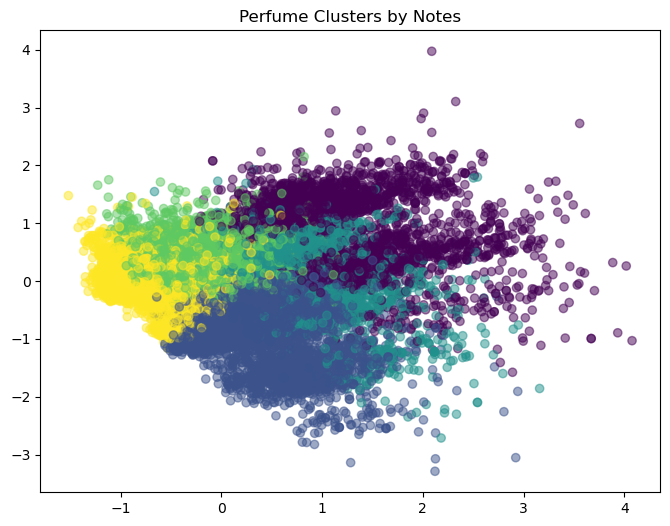

In [51]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_notes)

# Add cluster labels to dataframe
df['Cluster'] = clusters

# PCA for visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_notes.toarray())

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Perfume Clusters by Notes')
plt.show()

In [52]:
import plotly.express as px

fig = px.scatter(
    x=reduced[:,0], y=reduced[:,1],
    color=df['Cluster'].astype(str),
    hover_data={'Perfume': df['Perfume'], 'Brand': df['Brand']},
    title='Perfume Clusters by Notes'
)
fig.show()